In [50]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm

import data_funcs.helper_module as hm



In [2]:
def log_transform(frame:np.ndarray):
    return np.log(1 + np.sqrt(frame))


In [3]:

random_sample = np.load("random_5000_sample.npy")
sample_size = random_sample.shape[0]




In [4]:
def genereate_sample():
    
    sample_size = 5000
    random_frames = np.random.randint(low=0, high=86668, size = sample_size)

    random_sample= np.zeros((sample_size,256,256))

    for count,frame in tqdm(enumerate(random_frames)):
        random_sample[count,:,:] = dataset[frame,:,:]


    np.save(file=f"random_{sample_size}_sample.npy",arr= random_sample)

In [42]:
from numpy import unravel_index


def find_plot_max_prec_frame(sample:np.ndarray):
    
    
    max_prec_frame = np.zeros((256,256))
    max_prec_rate = 0
    for frame in tqdm(range(sample.shape[0])):
        
        max_frame_prec = np.nanmax(sample[frame,:,:])
        if max_frame_prec > max_prec_rate:
            max_prec_rate = max_frame_prec
            max_prec_frame = sample[frame,:,:]
            
    
    
    maxindex = max_prec_frame.argmax()
    max_x,max_y = unravel_index(max_prec_frame.argmax(), max_prec_frame.shape)
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 7))

    fig.suptitle('Radar Precipitation Rates')
    fig.patch.set_facecolor('white')
    ax1.scatter(max_y, max_x, s=300, facecolors='none', edgecolors='fuchsia')
    ax1.set_title(f"Max precipitation rate in frame: {np.max(max_prec_frame)} mm/hr, at idx {max_x,max_y}")
    im1 = ax1.imshow(max_prec_frame, cmap = "coolwarm")
    cbar = fig.colorbar(im1, orientation='vertical')
    cbar.set_label('mm/hr', rotation=270)

    sub_frame = max_prec_frame[max_x-5:max_x+5, max_y-5:max_y+5]
    ax2.imshow(sub_frame, cmap = "coolwarm")
    ax2.set_title("Sliced out sub frame with extreme values")
    for ax in (ax1, ax2):
        ax.set(xlabel='Km', ylabel='Km')


    plt.show()




100%|██████████| 5000/5000 [00:00<00:00, 5714.30it/s]
/var/folders/sk/0ps2wz_n1n9_lj7zjh2qpp7h0000gn/T/ipykernel_20108/2548865330.py:28: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(im1, orientation='vertical')


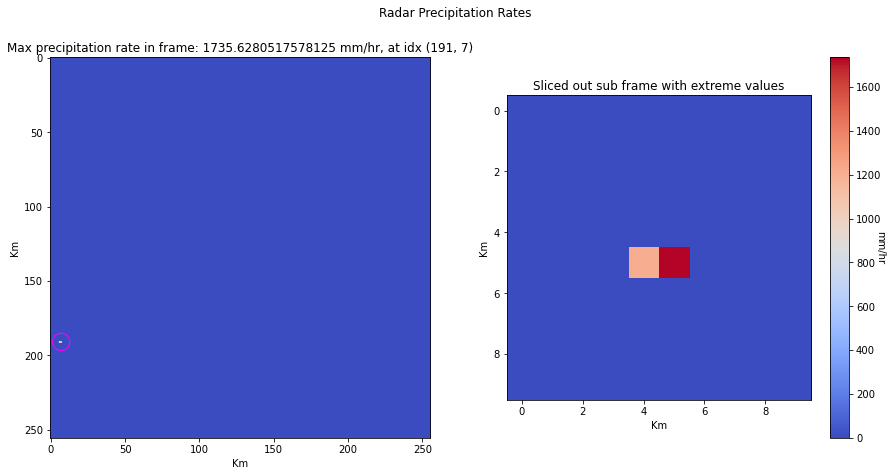

In [44]:
find_plot_max_prec_frame(sample=random_sample)


100%|██████████| 5000/5000 [00:00<00:00, 20851.75it/s]


Original data size : 5000 frames
New data size : 4895 frames
Removed : 105 frames


100%|██████████| 4895/4895 [00:00<00:00, 4930.30it/s]
/var/folders/sk/0ps2wz_n1n9_lj7zjh2qpp7h0000gn/T/ipykernel_20108/2548865330.py:28: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(im1, orientation='vertical')


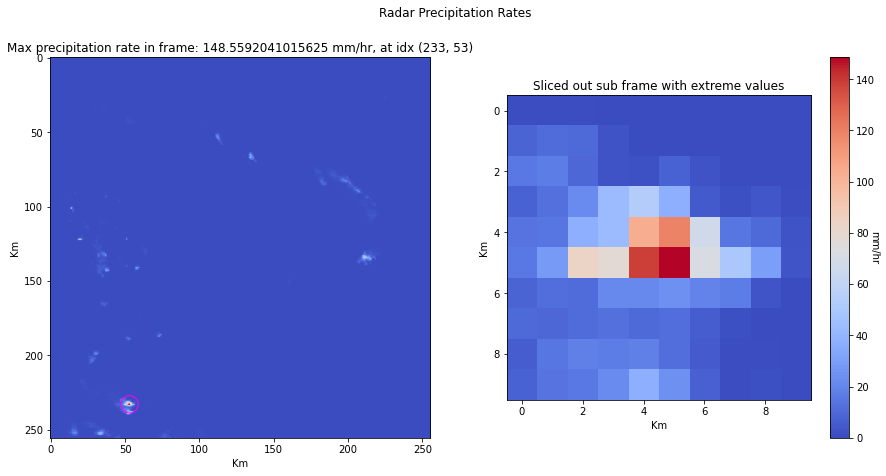

In [48]:

def treshold_prec_rate(sample: np.ndarray, treshold:float) -> np.ndarray:
    
    numb_of_frames_below_tresh = 0
    idx_list = []
    for i in tqdm(range(sample.shape[0])):
        frame = sample[i,:,:]
        if np.max(frame) < treshold:
            numb_of_frames_below_tresh +=1
            idx_list.append(i)
            
    if numb_of_frames_below_tresh:
        tresholded_data = np.zeros((numb_of_frames_below_tresh, 256,256))
        
        for j in range(len(idx_list)):
            tresholded_data[j,:,:] = sample[idx_list[j],:,:]
            
        print(f"Original data size : {sample.shape[0]} frames")    
        print(f"New data size : {tresholded_data.shape[0]} frames")    
        print(f"Removed : {sample.shape[0] - tresholded_data.shape[0]} frames")    
        return tresholded_data
    else:
        print(f"No frames below treshhold: {treshold}, {numb_of_frames_below_tresh=}")


tresh_data =  treshold_prec_rate(sample=random_sample, treshold = 150.0)

find_plot_max_prec_frame(tresh_data)

In [9]:
from unicodedata import decimal


def plot_histogram(dataset:np.ndarray, decimals:int, bins):
    flat_sample_data = np.reshape(dataset, newshape=(dataset.shape[0]*256*256))
    flat_sample_data = flat_sample_data[~np.isnan(flat_sample_data)]
    flat_sample_data = flat_sample_data[flat_sample_data != 0.0]
    flat_sample_data = np.around(flat_sample_data, decimals=decimals)
    
    plt.hist(flat_sample_data, bins=bins)
    plt.show()

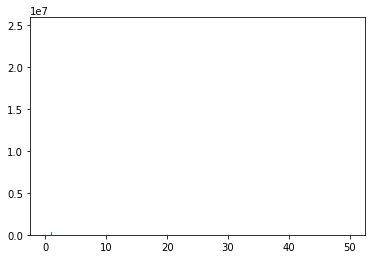

In [11]:
plot_histogram(tresh_data, decimals=1, bins= "auto")

